# Breast Cancer Diagnostics

**Problem Statement-** Breast Cancer is a serious and dangerous issue that affects thousands of lives of women and their loved ones. The tumor becomes vicious because of late diagnosis and hence late treatment. Although rarely, but breast cancer can also be found in Men.

**Approach-** Through the use of machine learning models, we can differentiate accurately and timely if a tumor is benign or malignant. This early and accurate diagnosis can help in effective treatment, controlling further spread and can save lives.

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#for unsupervised learning
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
#for clustering validation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

### Importing Data

In [2]:
df = pd.read_csv('data.csv')

#### Checking for missing values

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

it appears that there is a column that has 569 missing values

In [4]:
df.drop('Unnamed: 32', axis=1, inplace = True) #deleting Unnamed 32 for missing values

### About the Data

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Dataset consists of features extracted from digitalized images of breast mass. These features describe the position and various other characteristics of cell.
Some of these features are:
- a) radius (mean of distances from center to points on the perimeter) 
- b) texture (standard deviation of gray-scale values) 
- c) perimeter 
- d) area 
- e) smoothness (local variation in radius lengths) 
- f) compactness (perimeter^2 / area - 1.0) 
- g) concavity (severity of concave portions of the contour) 
- h) concave points (number of concave portions of the contour) 
- i) symmetry 
- j) fractal dimension ("coastline approximation" - 1)

there is also a column namely 'diagnosis', that gives the label if the corresponding parameters are of a Malignant Tumor (M) or a Benign tumor (B).
- **Benign:** These are not cancerous. They either cannot spread or grow, or they do so very slowly. If a doctor removes them, they do not generally return.
- **Malignant:** Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.

In [6]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### Data Exploration

### Count of Malignant and Benign tumor

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x= ['B', 'M'], y=df['diagnosis'].value_counts(), marker_color=['cyan', 'orange'])])
fig.update_layout(title_text="Count Chart for label of Diagnosis")
fig.show()

**There are 357 cases of Benign and 212 cases of malignant tumour in the data.**

In [8]:
data= df.drop(['id','diagnosis'], axis=1)

**Dropping down columns 'id' and 'diagnosis' as the former is an index while later is a label and we don't need them in clustering algorithms.**

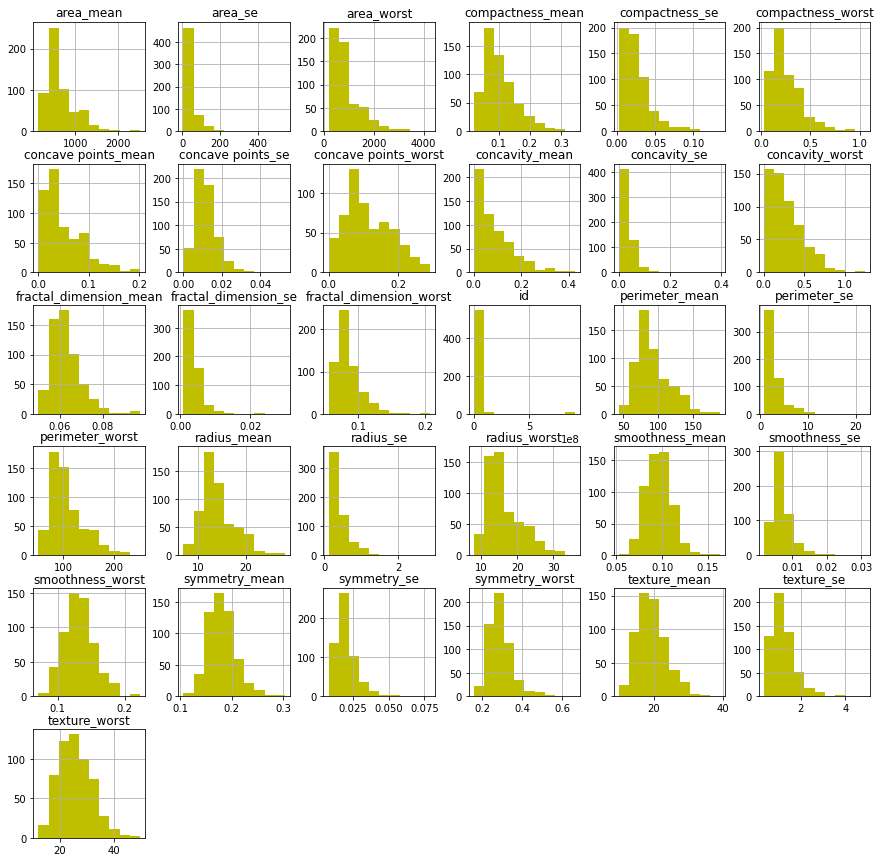

In [9]:
df.hist(figsize=(15,15), color= 'y')
plt.show()

In [10]:
#scatter matrix plots
fig = px.scatter_matrix(df,
    dimensions=["radius_mean", "smoothness_mean", "concavity_mean", "texture_mean", "compactness_mean",
                "symmetry_mean"],
    color="diagnosis")
title="Scatter matrix Plot"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1100,
                  height=900)
fig.show()

**Visulaizing bivariate relationship among features**

### Correlation Matrix

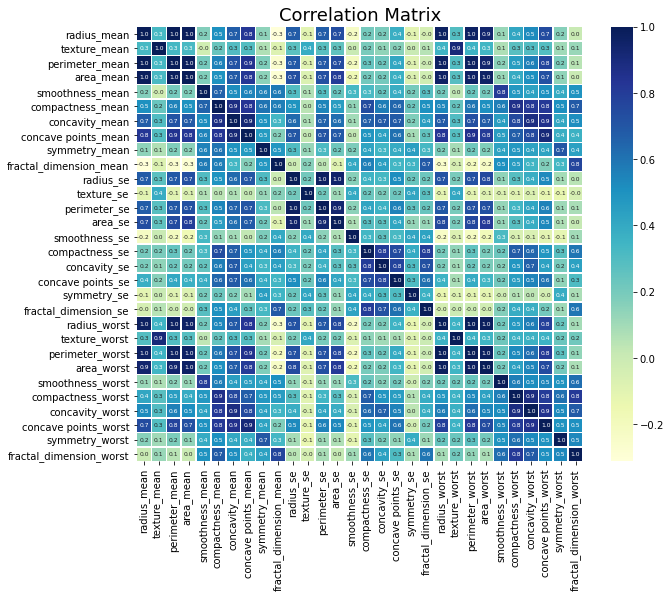

In [11]:
#measuring correlation
corr = data.corr()
f, ax = plt.subplots(figsize=(10,8))
#visualizing correlation among features through heatmap
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':6}, annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [12]:
#storing the values of diagnosis column in y
y= df['diagnosis'].values
from sklearn import preprocessing
# using binary labelizer to convert the strings of diagnosis to binary for accuracy score
lb = preprocessing.LabelBinarizer()
Y= lb.fit_transform(y)
#storing the values of features into X 
X=data.values

## Clustering Analysis

### Elbow Method

One of the most important steps in unsupervised learning is to determin optimal number of clusters for the data. Elbow Method is one such method that can be used to find the optimal number of clusters for our data. In this method we plot inertia i.e. the sum of squared distances of samples to their closest cluster center against the number of clusters. So for our given data we will iterate the values of k from 1 to 9 and calculate the inertia each time. At the point where inertia finally starts decreasing in a linear fashion, that point is the optial value for k.

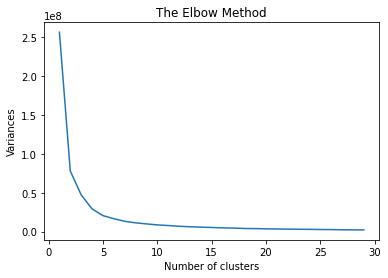

In [13]:
variances = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    variances.append(kmeans.inertia_)
plt.plot(range(1, 30), variances)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Variances')
plt.show()

From the plot we can infer that **the optimal number for 'k' will be '2'**

### Applying k- Means Algorithm

Steps in K- Means Algorithm
- First we initialize k points, called centroids, randomly.
- Assign each data points to the closest cluster centre.
- Once convergence is achieved the algorithm stops. The stopping criterion is when there is no re assignment of data points to different clusters.

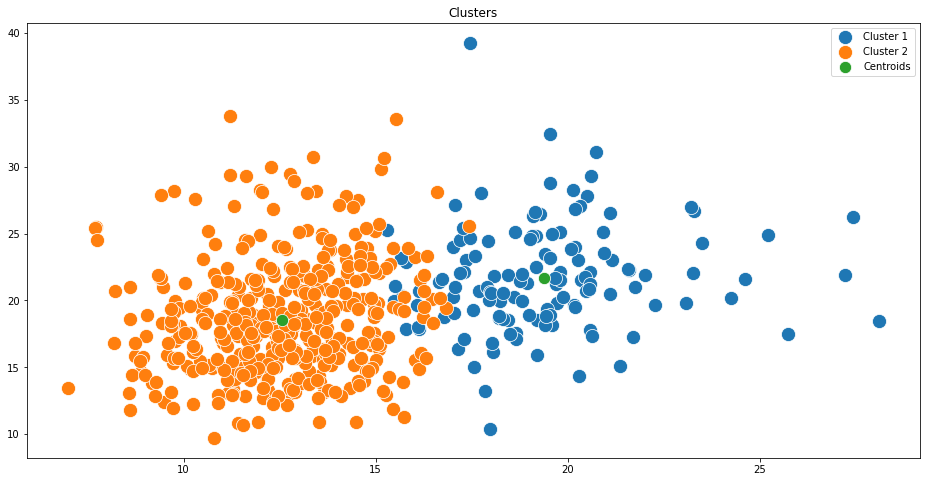

In [14]:
# fitting and applying k means model
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter= 600, n_init= 50)
clusters_km= km.fit_predict(X)
plt.figure(figsize=(16,8))
sns.scatterplot(X[clusters_km == 0, 0], X[clusters_km == 0, 1], s=200, label = 'Cluster 1') 
sns.scatterplot(X[clusters_km == 1, 0], X[clusters_km == 1, 1], s=200, label = 'Cluster 2')

#visualizing the clusters
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=150, label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

## Hierarchical Clustering

Producing a nested sequence of clustering

### Applying Agglomerative Clustering Algorithm

Steps in Agglomerative Clustering:
- It builds the dendogram(tree) from the bottom level
- Merges, the most similar or nearest points of clusters
- Stops when all the data points are merged into a single  cluster 

There are different similarity measures used in this algorithm
- Ward or Centroid Linkage
- Average Linakge
- Complete Linkage
- Single Linkage

### Dendograms

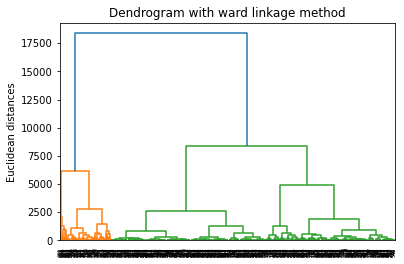

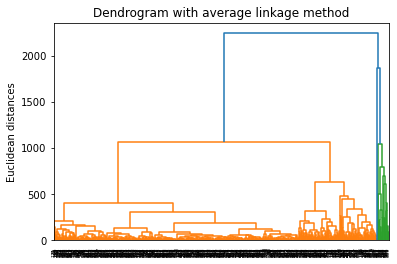

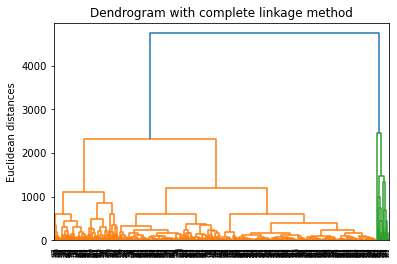

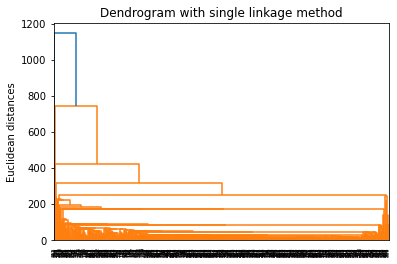

In [15]:
for method in ('ward', 'average', 'complete', 'single'):
    #Visualizing different dendograms for different linkages
    dendrogram = hc.dendrogram(hc.linkage(X, method = method))
    plt.title('Dendrogram with ' +method+ " linkage method")
    plt.ylabel('Euclidean distances')
    plt.show()

### Agglomerative Clustering Algorithm

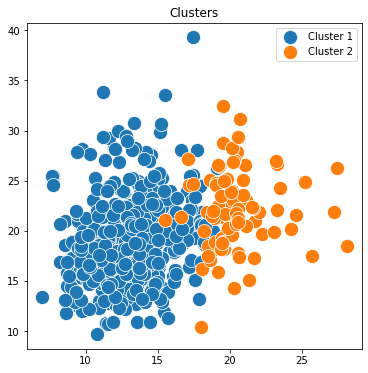

In [16]:
ac= AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean')
h_clusters = ac.fit_predict(X)
plt.figure(figsize=(6,6))
#visualizing the clusters
sns.scatterplot(X[h_clusters == 0, 0], X[h_clusters == 0, 1], marker = 'o', s=200, label= 'Cluster 1') 
sns.scatterplot(X[h_clusters == 1, 0], X[h_clusters == 1, 1], marker='o', s = 200, label= 'Cluster 2')

plt.title('Clusters')
plt.legend()
plt.show()

## Validating Clustering

**Clustering Validity Categories**
- **Internal Cluster Validation**: in this category clusters are validated based on the data clustered itself and not on any external labels.

- **External Cluster Validation**: Clustering is validated based on some externally given result, like class labels.

- **Relative Cluster Validation**: clusters are validated by varying parameters for the same algorithm.

### Internal Cluster Validation

#### Silhouette Score

It tells us how well a point is loacted in a cluster.
- if score is close to 0 for a data point then it is right at the inflection point between two clusters
- if score is close to -1 for a data point then it should be in other cluster.
- if score is close to +1 for a data point then it is well located


#### Davies Bouldin Index

It is a metric for evaluating clustering algorithms. Lower the DB index value, better is the clustering. It also has a drawback. A good value reported by this method does not imply the best information retrieval.

In [17]:
def internal_assessment(input_values, clustering_output, algorithm):
    #calculating silhouette index
    metric1= format(silhouette_score(input_values, clustering_output)*100, '.2f')
    #calculating db index
    metric2= format(davies_bouldin_score(input_values, clustering_output)*100, '.2f')
    print( 'Silhoulette Score for ', algorithm, ' ' , metric1)
    print('Davies Bouldin Score for ', algorithm, ' ',metric2)
    print('\n Now lets check how the score would have been different if we would have taken some other value of "k"')
    scoreshc_sil = []
    for n_clusters in range(2, 32):
    #applying and fitting agglomerative clustering for different number of clusters
        ac= algorithm(n_clusters = n_clusters).fit(input_values)
        clustershc_sil= ac.labels_
        scoreshc_sil.append(silhouette_score(input_values, clustershc_sil))
    f, ax = plt.subplots(figsize=(16,6))
    sns.lineplot(range(2 ,32), scoreshc_sil, color ='red', marker= "o")
    plt.title("Silhoulette Score for different number of clusters", fontsize= 18)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.show()

    scoreshc_db= []
    for n_clusters in range(2, 32):
        ac= algorithm(n_clusters = n_clusters).fit(input_values)
        clustershc_db= ac.labels_
        scoreshc_db.append(davies_bouldin_score(input_values, clustershc_db))
    f, ax = plt.subplots(figsize=(16,6))
    sns.lineplot(range(2, 32), scoreshc_db,color= 'green', marker= "o") 
    plt.title("DB Score for different number of clusters", fontsize= 18)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.show()
    

### Internal Assessment : KMEANS

Silhoulette Score for  <class 'sklearn.cluster._kmeans.KMeans'>   69.73
Davies Bouldin Score for  <class 'sklearn.cluster._kmeans.KMeans'>   50.44

 Now lets check how the score would have been different if we would have taken some other value of "k"


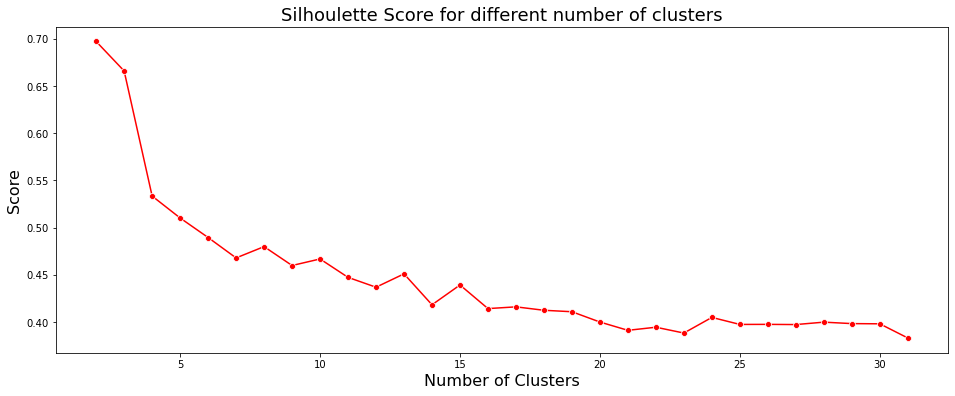

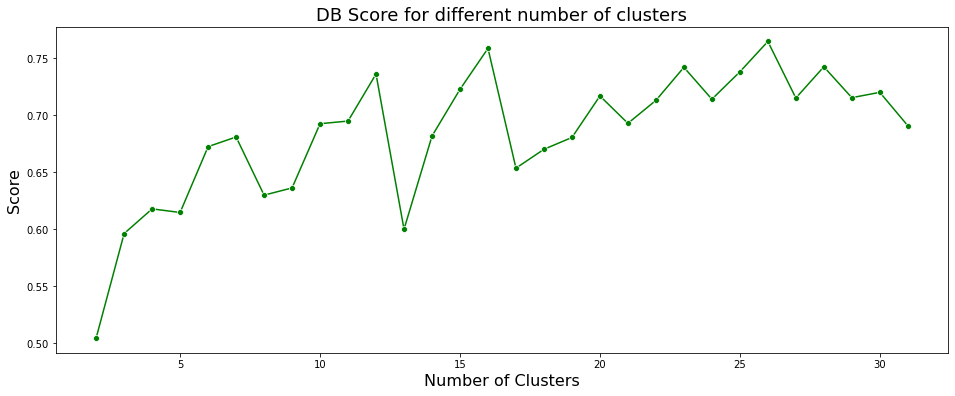

In [18]:
internal_assessment(X, clusters_km, KMeans)

### Internal Assessment:  AGGLOMERATIVE CLUSTERING

Silhoulette Score for  <class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>   69.00
Davies Bouldin Score for  <class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>   47.95

 Now lets check how the score would have been different if we would have taken some other value of "k"


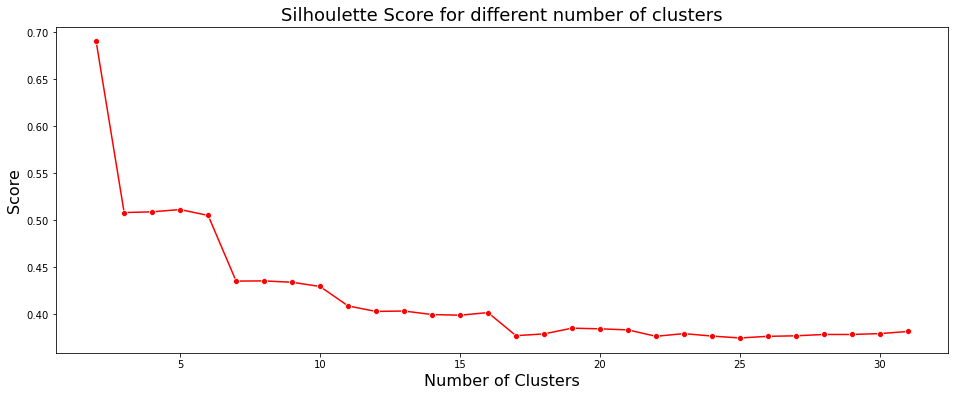

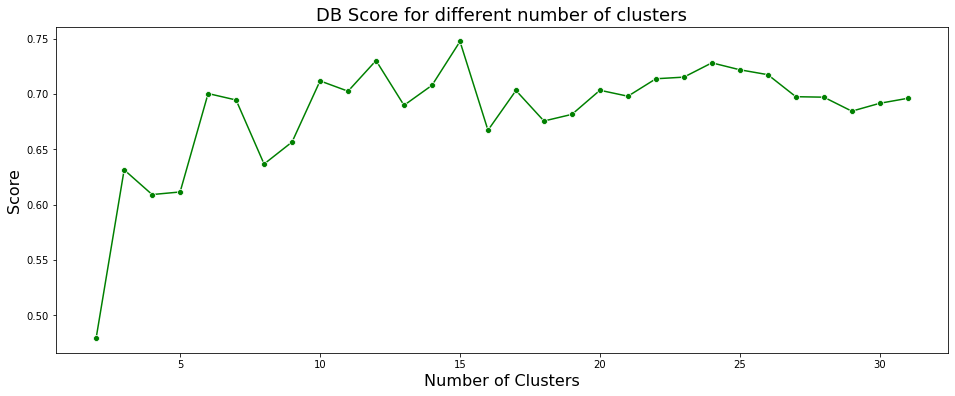

In [19]:
internal_assessment(X, h_clusters, AgglomerativeClustering)

**From internal assessment of both the algorithms we can infer that** 
- as '2' scores the highest score among all other values of k, it is the optimal value of k.
- Db index is lower for Agglomerative, which suggests that Agglomerative clustering is a better approach in this case

### External Clustering Validation

#### V Measure Score

V- Measure score calculates homogenity and completeness
- **perfect homogenity** is achieved when each cluster has data points belonging to the same class label.
- **perfect completeness** is achieved when each data point belonging to the same class label are in same cluster.

in the calculation of v measure, factor **beta** decides whether to favor homogenity or completness.
The advantage of this metric lies in the fact that it is independent of number of tru class labels, number of cluster, algorithm or size of data

In [20]:
def external_validation(input_values, true_labels, pred_clusters, algorithm):
    #flattening the true_labels into 1D for metric
    true_labels=true_labels.flatten()
    v_score= format(v_measure_score(true_labels, pred_clusters)*100, '.2f')
    print("V measure Score ", algorithm, " " , v_score)
    scores_v = []
    for n_clusters in range(2, 32):
    #applying and fitting clustering algorithm for different number of clusters
        ac= algorithm(n_clusters = n_clusters).fit(input_values)
        clusters_v= ac.labels_
        scores_v.append(v_measure_score(true_labels, clusters_v))
    f, ax = plt.subplots(figsize=(16,6))
    sns.lineplot(range(2 ,32), scores_v, color ='orange', marker= "o")
    plt.title("V Measure Score for different number of clusters in ", fontsize= 18)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.show()

### External Validation: KMEANS

V measure Score  <class 'sklearn.cluster._kmeans.KMeans'>   46.48


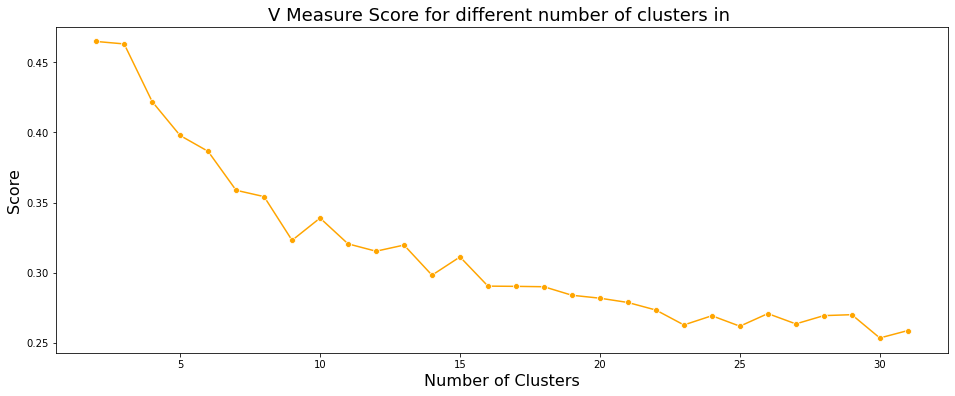

In [21]:
external_validation(X, Y, clusters_km, KMeans)

### External Validation: AGGLOMERATIVE CLUSTERING 

V measure Score  <class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>   31.91


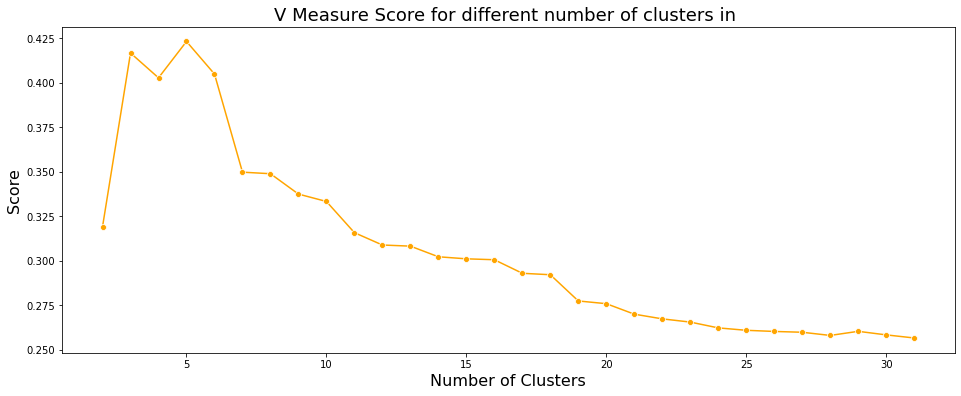

In [22]:
external_validation(X, Y, h_clusters, AgglomerativeClustering)

**From the above external validation scores we can infer that** 
- Kmeans has a better performance than Agglomerative clustering
- Also in Kmeans number of clusters = 2 brings out the best result however in case of agglomeratove clustering better results could have been achieved if the number of clusters were 5.

## Some Important Conclusions

- **During Internal Validation of Assessment Clustering if we compare the two algorithms, internal clustering validation score of Agglomerative Clustering is better than k- means.**

- **while external validation score of K-means is better than Agglomerative algorithm**.

### Thank You !!!